# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = '../SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = '../SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = '../SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_MATRIX = '../SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = '../SpamData/03_Testing/test-target.txt'

# Data

In [3]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Joint Probability

In [4]:
a = np.array([1,2,3])
b = np.array([0,5,4])

In [5]:
a.dot(b)

22

In [6]:
X_test.dot(prob_token_spam).shape

(1724,)

# Set the prior

In [7]:
PROB_SPAM = 0.3109

In [8]:
np.log(prob_token_spam)

array([ -4.40745773,  -5.25353254,  -4.98993498, ..., -10.70778471,
       -12.09407907, -11.40093189])

# Joint probability in log

In [9]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)

In [10]:
joint_log_spam[:5]

array([-1220.3531384 ,  -262.91348454,  -411.40826029, -1473.123696  ,
       -1240.04405417])

In [11]:
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [12]:
joint_log_ham.shape[0]

1724

# Making Predictions
## Comparar probabilidades juntas

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center> OR </center>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [13]:
prediction = joint_log_spam > joint_log_ham
prediction

array([ True,  True,  True, ..., False, False, False])

In [14]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

# Metricas
## Precision

In [15]:
correct_doc = (y_test == prediction).sum()
print(correct_doc)
wrong_doc = (y_test != prediction).sum()
print(wrong_doc)

1685
39


In [16]:
#Accuracy
accuracy = correct_doc/X_test.shape[0]

In [17]:
fraction_wrong = wrong_doc/len(X_test)
print(fraction_wrong)

0.02262180974477958


# Resultados

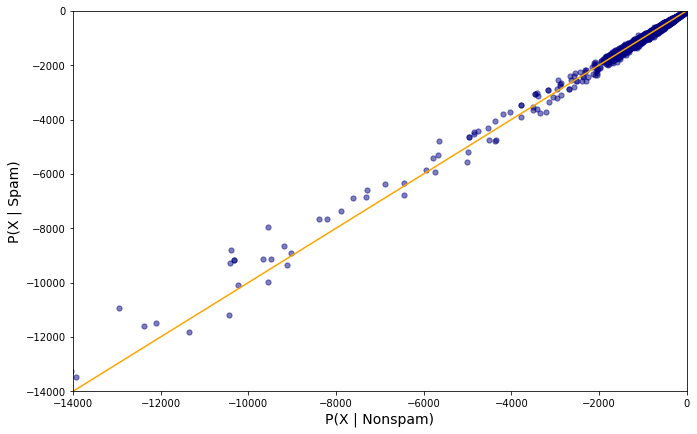

In [18]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=27)
plt.plot(linedata, linedata, color='orange')

plt.show()

# Borde de decision

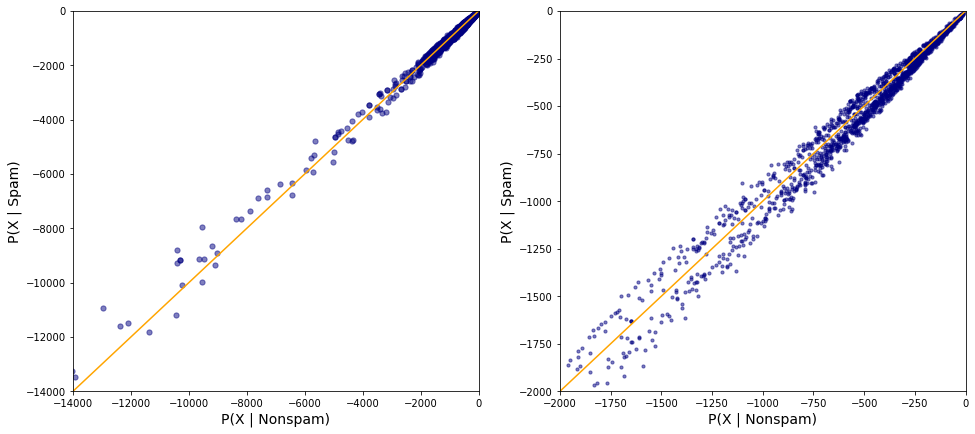

In [19]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=27)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1,2,2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha=0.5, s=10)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [20]:
sns.set_style("whitegrid")
labels = "Actual category"

summary_df = pd.DataFrame({yaxis_label:joint_log_spam, xaxis_label:joint_log_ham,
                          labels: y_test})

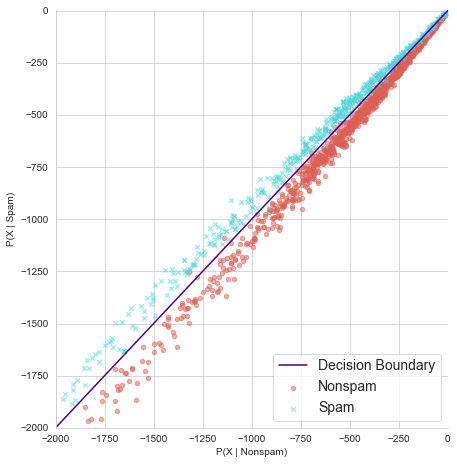

In [21]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5,
           fit_reg=False, scatter_kws={'alpha':0.5, 's':20}, hue=labels,
           markers=['o','x'], palette='hls', legend=False)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color='indigo')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

# False positives and false negatives

In [22]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [23]:
true_pos = (y_test==True) & (prediction == True)
true_pos.sum()

569

In [24]:
false_pos = (y_test==False) & (prediction == True)
false_pos.sum()

19

In [25]:
false_neg = (y_test==True) & (prediction == False)
false_neg.sum()

20

In [26]:
true_neg = (y_test==False) & (prediction == False)
true_neg.sum()

1116

# Recall Score

In [27]:
recall_scr = true_pos.sum() / (true_pos.sum() + false_neg.sum()) 

In [28]:
recall_scr

0.966044142614601

# Precision Score

In [29]:
precision_scr = true_pos.sum() / (true_pos.sum() + false_pos.sum())
precision_scr

0.967687074829932

# F-Score

In [31]:
f_score = 2 * (precision_scr * recall_scr ) / (precision_scr + recall_scr)
f_score

0.9668649107901445